In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [78]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data.drop(columns=['Id','Species'],axis=1))

MinMaxScaler()

In [80]:
scale_feature=scaler.transform(data.drop(columns=['Id','Species'],axis=1))
scale_feature

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [81]:
df_data=pd.DataFrame(scale_feature,columns=data.columns[1:-1])
df_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_data,data['Species'],test_size=0.20)

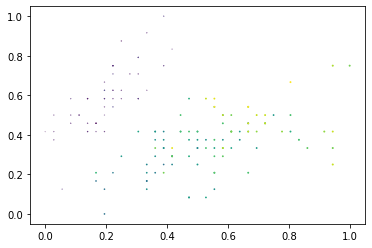

In [83]:
plt.scatter(df_data.SepalLengthCm,df_data.SepalWidthCm,df_data.PetalLengthCm,
            df_data.PetalWidthCm)

In [84]:
from sklearn.cluster import KMeans

In [85]:
km=KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [86]:
predict=km.fit_predict(df_data)
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 1, 1, 3, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

In [87]:
df_data['Output_Cluster']=predict
df_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Output_Cluster
145,0.666667,0.416667,0.711864,0.916667,1
146,0.555556,0.208333,0.677966,0.750000,0
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,1
149,0.444444,0.416667,0.694915,0.708333,0


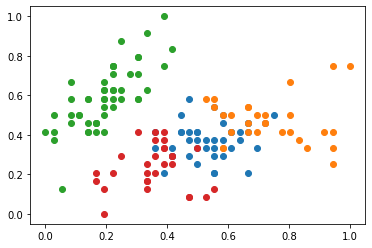

In [88]:
df1=df_data[df_data.Output_Cluster==0]
df2=df_data[df_data.Output_Cluster==1]
df3=df_data[df_data.Output_Cluster==2]
df4=df_data[df_data.Output_Cluster==3]

#It is hard to visulize 4-D Graph for the sake of simplicity let's create 2-D greaph

plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm)
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm)
plt.scatter(df3.SepalLengthCm,df3.SepalWidthCm)
plt.scatter(df4.SepalLengthCm,df4.SepalWidthCm)



From the above grpah we can see that our cluster is miss match.

so,let's findout perfect cluster value .

In [89]:
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(df_data)
    sse.append(km.inertia_)
sse

[220.0981720229777,
 52.46084958944042,
 24.833538433450673,
 5.5328310030819,
 4.571211374951954,
 3.971386882757748,
 3.48046822663946,
 3.1607468433315313,
 2.8833824295162604,
 2.6129381150160444]

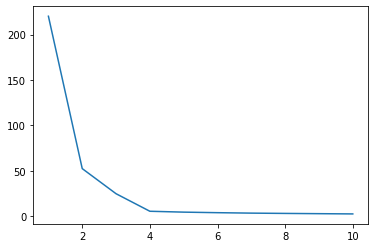

In [90]:
#Let's Findout the perfect value of cluster using Elbow Technique
plt.plot(range(1,11),sse)

So, according to the Elbow plot Best value for cluster is 3

In [91]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [95]:
predict=km.fit_predict(df_data)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)